## CS655 Computer Networks

### Analyzing Transmission Policies for Adaptive Video

#### Experiment 3: Mobile User with Stable Network (bus_62)

In [1]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving mobile_stable.zip to mobile_stable.zip
User uploaded file "mobile_stable.zip" with length 11502 bytes


In [2]:
!unzip mobile_stable.zip

Archive:  mobile_stable.zip
  inflating: basic.csv               
  inflating: netflix.csv             
  inflating: sara.csv                


In [3]:
basic_filename = "basic.csv"
netflix_filename = "netflix.csv"
sara_filename = "sara.csv"

In [4]:
import matplotlib.pyplot as plt
import pandas as pd

def draw_img(filename, fmt, label):
  c = {'INITIAL_BUFFERING': 'violet', 'PLAY': 'lightcyan', 'BUFFERING': 'lightpink'}

  dash = pd.read_csv(filename)
  dash = dash.loc[dash.CurrentPlaybackState.isin(c.keys() )]
  states = pd.DataFrame({'startState': dash.CurrentPlaybackState[0:-2].values, 'startTime': dash.EpochTime[0:-2].values,
                          'endState':  dash.CurrentPlaybackState[1:-1].values, 'endTime':   dash.EpochTime[1:-1].values})


  for index, s in states.iterrows():
    plt.axvspan(s['startTime'], s['endTime'],  color=c[s['startState']], alpha=1) 

  plt.ylim(0,1500000)
  plt.plot(dash[dash.Action!="Writing"].EpochTime, dash[dash.Action!="Writing"].Bitrate, fmt, label=label)
  plt.title("Video rate (bps)");
  plt.xlabel("Time (s)");
  plt.legend()
  plt.show()

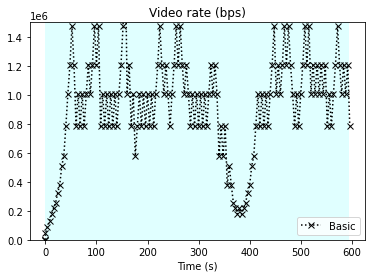

In [5]:
draw_img(basic_filename, 'xk:', 'Basic')

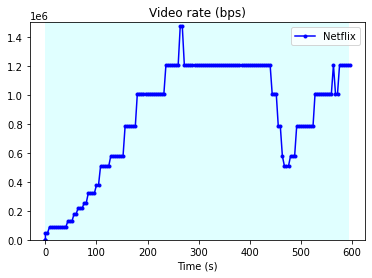

In [6]:
draw_img(netflix_filename, '.b-', 'Netflix') 

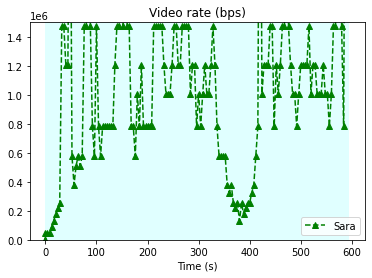

In [7]:
draw_img(sara_filename, '^g--', 'Sara') 

In [8]:
c = {'INITIAL_BUFFERING': 'violet', 'PLAY': 'lightcyan', 'BUFFERING': 'lightpink'}
def get_statistics(filename):
  data = pd.read_csv(filename)
  data = data.loc[data.CurrentPlaybackState.isin(c.keys() )]
  bitrate = data[data.Action!="Writing"].Bitrate.div(1000).mean()
  variance =  data[data.Action!="Writing"].Bitrate.div(1000).var()
  states = pd.DataFrame({'startState': data.CurrentPlaybackState[0:-2].values, 'startTime': data.EpochTime[0:-2].values,
                          'endState':  data.CurrentPlaybackState[1:-1].values, 'endTime':   data.EpochTime[1:-1].values})
  initial_beffering = 0
  interruption = 0
  
  for index, s in states.iterrows():
    if s['startState'] == "INITIAL_BUFFERING":
      initial_beffering += s['endTime'] - s['startTime']
    elif s['startState'] == "BUFFERING":
      interruption += s['endTime'] - s['startTime']
  return bitrate, variance, initial_beffering, interruption


In [9]:
print('bitrate, variance, initial_beffering, interruption')
print(get_statistics(basic_filename))
print(get_statistics(netflix_filename))
print(get_statistics(sara_filename))


bitrate, variance, initial_beffering, interruption
(909.2766405228756, 140822.15330591597, 0.0040271282196, 0)
(840.3530784313726, 165575.10286800694, 0.00248599052429, 0)
(1120.1922679738564, 696355.7692778554, 0.00434398651123, 0)


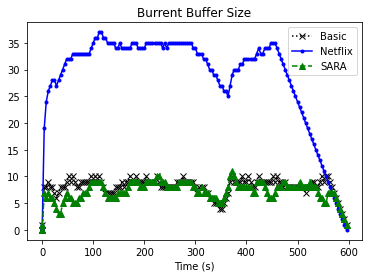

In [10]:
import matplotlib.pyplot as plt
import pandas as pd


c = {'INITIAL_BUFFERING': 'violet', 'PLAY': 'lightcyan', 'BUFFERING': 'lightpink'}

basic = pd.read_csv(basic_filename)
basic = basic.loc[basic.CurrentPlaybackState.isin(c.keys() )]

netflix = pd.read_csv(netflix_filename)
netflix = netflix.loc[netflix.CurrentPlaybackState.isin(c.keys() )]

sara = pd.read_csv(sara_filename)
sara = sara.loc[sara.CurrentPlaybackState.isin(c.keys() )]

plt.plot(basic[basic.Action!="Writing"].EpochTime, basic[basic.Action!="Writing"].CurrentBufferSize, 'xk:', label="Basic")
plt.plot(netflix[netflix.Action!="Writing"].EpochTime, netflix[netflix.Action!="Writing"].CurrentBufferSize, '.b-', label="Netflix")
plt.plot(sara[sara.Action!="Writing"].EpochTime, sara[sara.Action!="Writing"].CurrentBufferSize, '^g--', label="SARA")
plt.title("Burrent Buffer Size");
plt.xlabel("Time (s)");
plt.legend()
plt.show()